# Task 1

In [1]:
import pandas as pd
import seaborn as sns

# Load the dataset
file_path = '01_homely_resort_listing.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
data.head()

,accommodates,amenities,availability_30,bathrooms,bed_type,bedrooms,beds,calculated_host_listings_count,cancellation_policy,guests_included,...,number_of_reviews,property_type,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,room_type,Unnamed: 25,price
0,6,"{""Cable TV"",Internet,""Wireless Internet"",""Air ...",0,2.5,Real Bed,1.0,3.0,1,moderate,1,...,1,House,10.0,10.0,10.0,100.0,10.0,Private room,NaN,$300.00
1,2,"{""Air Conditioning"",Heating,""Family/Kid Friend...",29,0.0,Futon,1.0,1.0,1,moderate,1,...,0,Camper/RV,NaN,NaN,NaN,NaN,NaN,Private room,NaN,$99.00
2,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",30,1.5,Real Bed,1.0,1.0,2,flexible,1,...,0,House,NaN,NaN,NaN,NaN,NaN,Private room,NaN,$100.00
3,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",30,1.5,Real Bed,1.0,1.0,2,flexible,1,...,0,House,NaN,NaN,NaN,NaN,NaN,Private room,NaN,$100.00
4,6,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",27,2.0,Real Bed,3.0,3.0,2,strict,1,...,0,House,NaN,NaN,NaN,NaN,NaN,Entire home/apt,NaN,$599.00


## Data Cleaning

In [29]:
# Assuming 'latitude' and 'longitude' are the names of the columns you want to remove along with 'amenities'
# Adjust the column names if they are different in your dataset

# Remove 'amenities', 'latitude', and 'longitude' columns
columns_to_remove = ['amenities', 'latitude(North)', 'longitude(East)'] # Adjust column names as necessary
data_cleaned = data_cleaned.drop(columns=[col for col in columns_to_remove if col in data_cleaned.columns])

# Check the shape of the updated dataset
final_shape = data_cleaned.shape

final_shape

(3735, 23)

In [30]:
data_cleaned.info

<bound method DataFrame.info of       accommodates  availability_30  bathrooms  bed_type  bedrooms  beds  \
0                6                0        2.5  Real Bed       1.0   3.0   
7                2               16        1.0  Real Bed       1.0   1.0   
9                2               29        1.0  Real Bed       1.0   1.0   
11               2               24        1.0  Real Bed       1.0   1.0   
12               2               25        1.0  Real Bed       1.0   1.0   
...            ...              ...        ...       ...       ...   ...   
5826             4               20        1.0  Real Bed       1.0   1.0   
5827             8               19        3.0  Real Bed       4.0   4.0   
5828             4                0        1.0  Real Bed       0.0   1.0   
5829             4               17        1.0  Real Bed       1.0   2.0   
5830             4               15        1.0  Real Bed       1.0   2.0   

      calculated_host_listings_count cancellation_polic

## EDA (Histogram, Scatterplot and Box Plot)

### A histogram to show the distribution of prices.

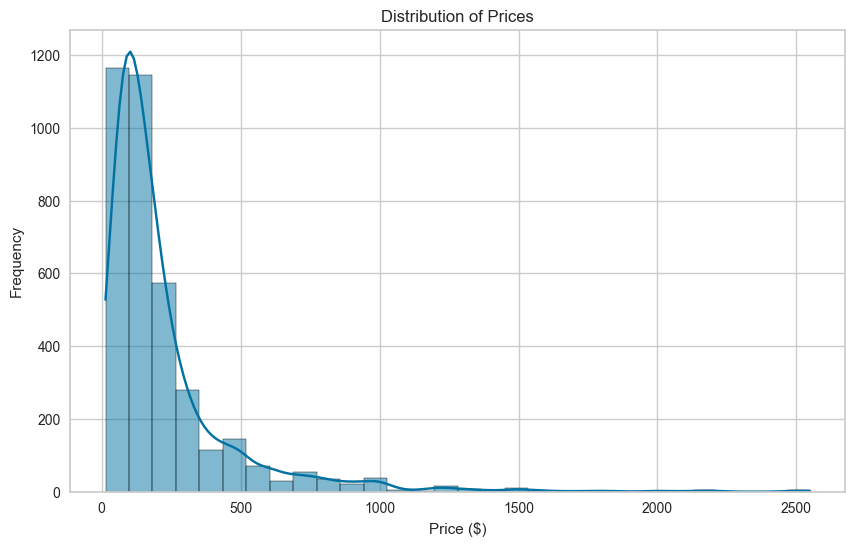

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert price from string to float
data_cleaned['price'] = data_cleaned['price'].replace('[\$,]', '', regex=True).astype(float)

# Visualization 1: Distribution of prices
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['price'], bins=30, kde=True)
plt.title('Distribution of Prices')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### A scatter plot to visualize the relationship between the number of bedrooms and the price.


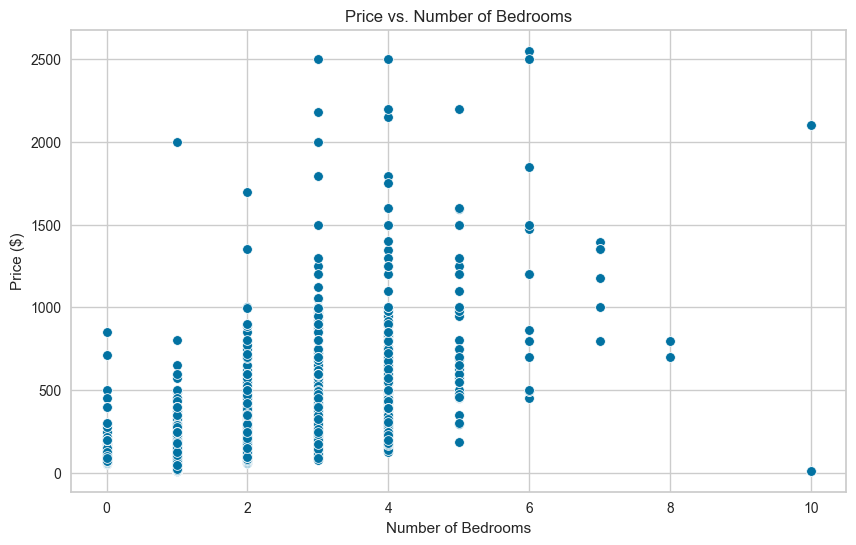

In [32]:
# Visualization 2: Relationship between number of bedrooms and price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bedrooms', y='price', data=data_cleaned)
plt.title('Price vs. Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price ($)')
plt.grid(True)
plt.show()

### A box plot to compare the prices across different room types.


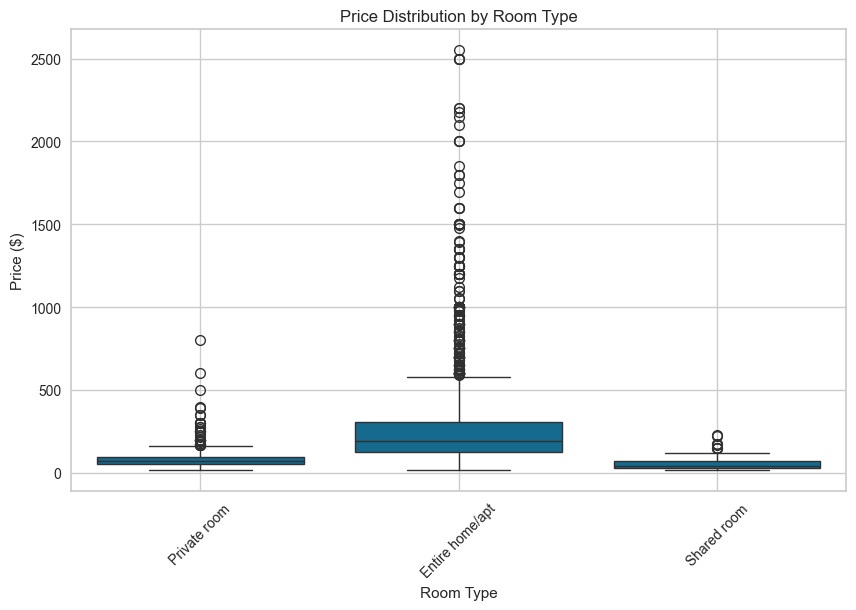

In [33]:
# Visualization 3: Prices across different room types
plt.figure(figsize=(10, 6))
sns.boxplot(x='room_type', y='price', data=data_cleaned)
plt.title('Price Distribution by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

* Distribution of Prices: This histogram shows the distribution of prices for the listings. It appears to be right-skewed, indicating that most of the listings are priced on the lower end, with fewer listings at higher prices.

* Price vs. Number of Bedrooms: The scatter plot visualizes the relationship between the number of bedrooms in a listing and its price. There seems to be a positive correlation where listings with more bedrooms tend to have higher prices, which is an expected trend.

* Price Distribution by Room Type: The box plot compares the prices across different room types. It provides insights into the price ranges for each room type, showing variability and median prices. The plot highlights differences in price distributions, indicating that entire homes/apartments tend to be priced higher than private rooms or shared rooms.

# Task 2 (Data Transformation, Feature Engineering and Model Training)

## Step 1: Initalize environment and setup dataset in pycaret

In [34]:
from pycaret.regression import setup, compare_models, create_model, tune_model, evaluate_model, plot_model, predict_model, save_model
import pycaret

# Assuming 'price' is the target variable for a regression task. Adjust the target variable as necessary.
# Initialize the PyCaret environment
exp_reg101 = setup(data=data_cleaned, target='price', session_id=1234,feature_selection=True)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000262 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 371
[LightGBM] [Info] Number of data points in the train set: 2614, number of used features: 32
[LightGBM] [Info] Start training from score 221.401301


,Description,Value
0,Session id,1234
1,Target,price
2,Target type,Regression
3,Original data shape,"(3735, 23)"
4,Transformed data shape,"(3735, 5)"
5,Transformed train set shape,"(2614, 5)"
6,Transformed test set shape,"(1121, 5)"
7,Numeric features,15
8,Categorical features,7
9,Preprocess,True


## Step 2: Select and train model

In [35]:
# Compare models to find the best one
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,103.8508,36562.4306,188.9828,0.3967,0.5995,0.6606,0.0860
lr,Linear Regression,112.1929,39362.1118,195.2405,0.3610,0.6902,0.8162,0.0940
lasso,Lasso Regression,112.1859,39362.7096,195.2399,0.3610,0.6903,0.8166,0.0690
ridge,Ridge Regression,112.1929,39362.1182,195.2405,0.3610,0.6902,0.8163,0.0650
lar,Least Angle Regression,112.1929,39362.1118,195.2405,0.3610,0.6902,0.8162,0.0640
llar,Lasso Least Angle Regression,112.1859,39362.7033,195.2399,0.3610,0.6903,0.8166,0.0650
br,Bayesian Ridge,112.1956,39362.8511,195.2398,0.3610,0.6903,0.8169,0.0640
en,Elastic Net,112.4640,39446.7203,195.4136,0.3602,0.6917,0.8296,0.0690
lightgbm,Light Gradient Boosting Machine,108.8773,40057.9084,198.0689,0.3359,0.6264,0.7024,0.1530
huber,Huber Regressor,103.5175,42411.7152,202.4546,0.3151,0.6224,0.6145,0.0700


## Step 3: Tune Model

In [27]:
# Tune the created model to optimize its parameters
tuned_model = tune_model(best_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,147.2575,74607.3046,273.1434,0.0680,0.8571,1.1026
1,131.7136,35365.7063,188.0577,0.1429,0.8266,1.1408
2,152.1897,53106.6205,230.4487,0.0518,0.8845,1.2357
3,144.7990,49306.0629,222.0497,0.1290,0.8373,1.0891
4,146.3550,49851.8691,223.2753,0.0983,0.8299,1.0434
5,126.8911,43489.9883,208.5425,0.2714,0.7231,0.8861
6,133.2054,36516.9594,191.0941,0.0684,0.8544,1.1709
7,156.6003,75757.7645,275.2413,0.0584,0.8584,1.0936
8,164.2007,84144.1432,290.0761,0.0853,0.9184,1.2861


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


## Step 4: Evaluate Model

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

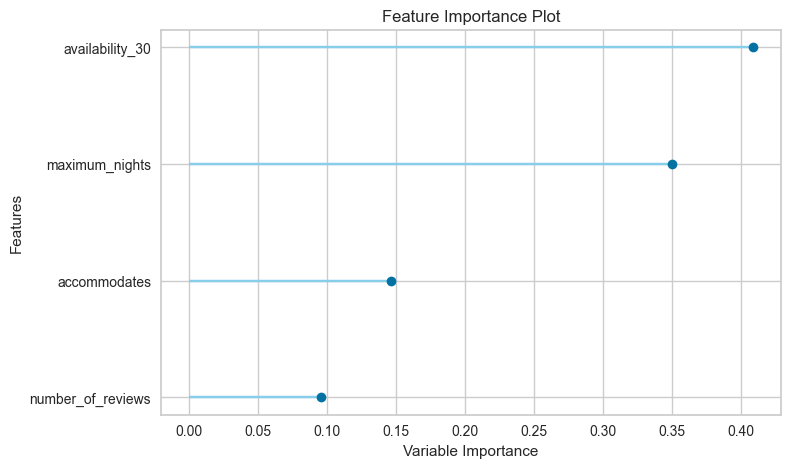

In [36]:
# Evaluate the model's performance
evaluate_model(tuned_model)

# Optional: Plot model metrics or feature importance
plot_model(tuned_model, plot='feature')


## Step 5: Predict Data

In [93]:
# List of all features your model expects
all_features = [
    'accommodates', 'bathrooms', 'bedrooms', 'beds',
    'availability_30', 'bed_type', 'calculated_host_listings_count', 'cancellation_policy',
    'guests_included', 'has_availability', 'host_is_superhost', 'host_listings_count',
    'instant_bookable', 'latitude(North)', 'longitude(East)', 'maximum_nights',
    'number_of_reviews', 'property_type', 'review_scores_checkin',
    'review_scores_communication', 'review_scores_location', 'review_scores_rating',
    'review_scores_value', 'room_type'
]

# Assume top 5 features are accommodates, bathrooms, bedrooms, beds, and availability_30
top_features = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'availability_30']

# Initialize all features with a default value of 0
default_input = {feature: 0 for feature in all_features}

# Collect user input for top 5 features
user_input = {}
for feature in top_features:
    user_input[feature] = input(f'Enter value for {feature}: ')

# Update the default input with user input
default_input.update(user_input)

# Convert the combined input into a DataFrame
user_input_df = pd.DataFrame([default_input])

# Use the model to predict
predictions = predict_model(tuned_model, data=user_input_df)

# Extract the predicted price
predicted_price = predictions['prediction_label'].iloc[0]
predicted_price_rounded = round(predicted_price, 2)


# Print the predicted price with a dollar sign
print("Predicted Price: $", "{:.2f}".format(predicted_price_rounded))

Predicted Price: $ 1800.80


## Step 6: Save and Log Experiment

In [94]:
# Save the model
save_model(tuned_model, 'tuned_model_for_price_prediction')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['accommodates', 'availability_30',
                                              'bathrooms', 'bedrooms', 'beds',
                                              'calculated_host_listings_count',
                                              'guests_included',
                                              'host_listings_count',
                                              'latitude(North)',
                                              'longitude(East)',
                                              'maximum_nights',
                                              'number_of_reviews',
                                              'review_scores_checkin',
                                              'review_scores_communic...
                                                                     'property_type',
                                                        

## Step 7: Register the Model (with MLFlow)

In [ ]:
!pip install mlflow

In [ ]:
import mlflow
mlflow.pyfunc.log_model('homely_resort_price_predictor', 'models/skye/tuned_model_for_price_prediction.pkl')

In [ ]:
!mlflow ui